<a href="https://colab.research.google.com/github/Cdiallo77/STA9750-2024-FALL/blob/main/PCA%20Part%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-a74030ed0fd1>:10: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2023 = pd.read_csv('airbnb_nyc_2023.csv')
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Comparison of PC1, PC2 Loadings, PC3 Loadings:
                                        PC1       PC2       PC3
minimum_nights                     0.132805  0.002193  0.434187
number_of_reviews                 -0.060774  0.349381  0.170794
availability_365                   0.071679  0.472853  0.481936
room_type_Private room            -0.231904  0.210873 -0.468472
room_type_Shared room              0.051939  0.044189  0.432222
neighbourhood_group_Brooklyn      -0.658583 -0.301554  0.240631
neighbourhood_group_Manhattan      0.692786 -0.180276 -0.098786
neighbourhood_group_Queens        -0.057829  0.679501 -0.251772
neighbourhood_group_Staten Island -0.005002  0.150875  0.112766


<Figure size 1400x800 with 0 Axes>

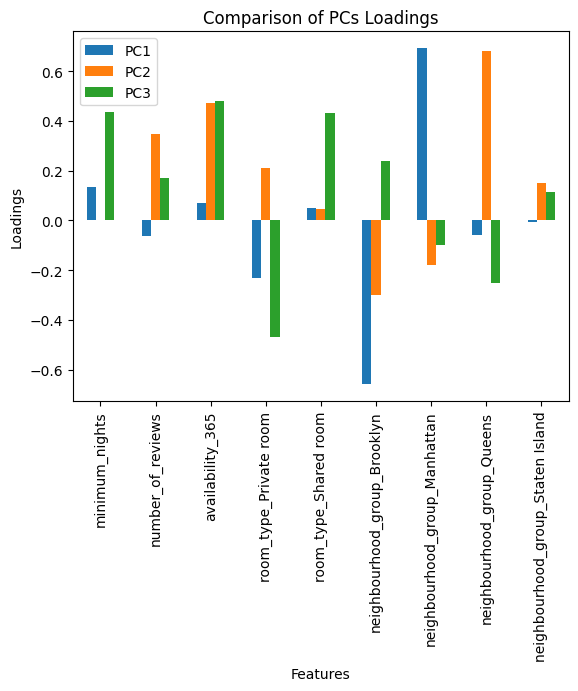

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load datasets
data_2019 = pd.read_csv('airbnb_nyc_2019.csv')
data_2023 = pd.read_csv('airbnb_nyc_2023.csv')

# Select relevant features
features = ['room_type', 'neighbourhood_group', 'minimum_nights', 'number_of_reviews', 'availability_365', 'price']

data_2019 = data_2019[features]
data_2023 = data_2023[features]

# Handle categorical variables using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_2019 = encoder.fit_transform(data_2019[['room_type', 'neighbourhood_group']])
encoded_2023 = encoder.transform(data_2023[['room_type', 'neighbourhood_group']])

# Create DataFrames for the encoded features
encoded_df_2019 = pd.DataFrame(encoded_2019, columns=encoder.get_feature_names_out(['room_type', 'neighbourhood_group']))
encoded_df_2023 = pd.DataFrame(encoded_2023, columns=encoder.get_feature_names_out(['room_type', 'neighbourhood_group']))

# Concatenate the encoded features with the original DataFrame (excluding the original categorical columns)
data_2019 = pd.concat([data_2019.drop(['room_type', 'neighbourhood_group'], axis=1), encoded_df_2019], axis=1)
data_2023 = pd.concat([data_2023.drop(['room_type', 'neighbourhood_group'], axis=1), encoded_df_2023], axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_2019 = pd.DataFrame(imputer.fit_transform(data_2019), columns=data_2019.columns)
data_2023 = pd.DataFrame(imputer.transform(data_2023), columns=data_2023.columns)

# Standardize the data
scaler = StandardScaler()
data_scaled_2019 = scaler.fit_transform(data_2019.drop('price', axis=1))
data_scaled_2023 = scaler.transform(data_2023.drop('price', axis=1))

# Perform PCA
pca = PCA(n_components=5)
principal_components_2019 = pca.fit_transform(data_scaled_2019)
principal_components_2023 = pca.transform(data_scaled_2023)

# Create a DataFrame with the principal components
pca_df_2019 = pd.DataFrame(data=principal_components_2019, columns=[f'PC{i+1}' for i in range(5)])
pca_df_2019['price'] = data_2019['price'].values

pca_df_2023 = pd.DataFrame(data=principal_components_2023, columns=[f'PC{i+1}' for i in range(5)])
pca_df_2023['price'] = data_2023['price'].values

# Visualize PCA loadings
loadings = pd.DataFrame(pca.components_.T, index=data_2019.drop('price', axis=1).columns, columns=[f'PC{i+1}' for i in range(5)])

# Compare PC1 and PC2 loadings
pc1_loadings = loadings['PC1']
pc2_loadings = loadings['PC2']
pc3_loadings = loadings['PC3']


comparison_df = pd.DataFrame({'PC1': pc1_loadings, 'PC2': pc2_loadings,'PC3': pc3_loadings })

print("Comparison of PC1, PC2 Loadings, PC3 Loadings:")
print(comparison_df)

plt.figure(figsize=(14, 8))
comparison_df.plot(kind='bar')
plt.title('Comparison of PCs Loadings')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=90)
plt.show()